# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from scipy.stats import zscore
%matplotlib notebook

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")
# set up lists to hold reponse info
City_name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
#Set the index counter to 0 to begin with
index_counter = 0
#Set the set counter to begin the steps with 1
set_counter = 1
#Set a maximum number to end the loop after it starts with one in for enumerate loop
limit = 50
#Once the loop index counter hits 50, it assigns the value of maximum limit to 49 for the consecutive loops
new_limit = 49
#Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities, 1):
    # Save config information.
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    
    try:
        
        City_name.append(city_json['name'])
        Lat.append(city_json["coord"]['lat'])
        Lng.append(city_json["coord"]['lon'])
        Max_Temp.append(city_json['main']['temp_max'])
        Humidity.append(city_json['main']['humidity'])
        Cloudiness.append(city_json['clouds']['all'])
        Wind_Speed.append(city_json["wind"]["speed"])
        Country.append(city_json['sys']['country'])
        Date.append(city_json['dt'])
        if index_counter == limit:
            limit = new_limit
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        print(f'Processing Record {index_counter} of Set{set_counter}: {city}')
    
    except:
        print('City not found. Skipping...')
        time.sleep(2)
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Create a data frame from the above data collected  
city_data = pd.DataFrame({'City':City_name,
                          'Lat':Lat,
                          'Lng':Lng,
                          'Max Temp':Max_Temp,
                          'Humidity':Humidity,
                          'Cloudiness':Cloudiness,
                          'Wind Speed':Wind_Speed,
                          'Country':Country,
                          'Date':Date})


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set1: talaya
Processing Record 2 of Set1: vaini
Processing Record 3 of Set1: avarua
Processing Record 4 of Set1: novyy svit
Processing Record 5 of Set1: pochutla
Processing Record 6 of Set1: piranshahr
Processing Record 7 of Set1: qaanaaq
Processing Record 8 of Set1: atuona
Processing Record 9 of Set1: ushuaia
Processing Record 10 of Set1: svetlaya
Processing Record 11 of Set1: dikson
Processing Record 12 of Set1: perth
Processing Record 13 of Set1: victoria
City not found. Skipping...
Processing Record 14 of Set1: hithadhoo
City not found. Skipping...
Processing Record 15 of Set1: rena
Processing Record 16 of Set1: puerto escondido
Processing Record 17 of Set1: arraial do cabo
Processing Record 18 of Set1: hobart
City not found. Skipping...
Processing Record 19 of Set1: aljezur
Processing Record 20 of Set1: mataura
Processing Record 21 of Set1: soe
Processing Record 22 of Set1: puerto ayora
Processing Recor

Processing Record 47 of Set4: thinadhoo
City not found. Skipping...
Processing Record 48 of Set4: linxia
Processing Record 49 of Set4: kununurra
Processing Record 0 of Set5: norman wells
Processing Record 1 of Set5: geraldton
Processing Record 2 of Set5: shar
City not found. Skipping...
Processing Record 3 of Set5: haines junction
Processing Record 4 of Set5: waconia
City not found. Skipping...
Processing Record 5 of Set5: mount isa
Processing Record 6 of Set5: cherskiy
Processing Record 7 of Set5: narsaq
Processing Record 8 of Set5: kazerun
Processing Record 9 of Set5: yumen
Processing Record 10 of Set5: manta
Processing Record 11 of Set5: uddevalla
Processing Record 12 of Set5: veraval
Processing Record 13 of Set5: dubuque
City not found. Skipping...
Processing Record 14 of Set5: namatanai
Processing Record 15 of Set5: iquique
Processing Record 16 of Set5: nawa
Processing Record 17 of Set5: roebourne
Processing Record 18 of Set5: lavrentiya
Processing Record 19 of Set5: grand gaube
P

Processing Record 47 of Set8: kerema
Processing Record 48 of Set8: tucurui
City not found. Skipping...
Processing Record 49 of Set8: barcelona
Processing Record 0 of Set9: avera
Processing Record 1 of Set9: husavik
Processing Record 2 of Set9: tuatapere
Processing Record 3 of Set9: mehamn
Processing Record 4 of Set9: rio branco
Processing Record 5 of Set9: ennis
Processing Record 6 of Set9: chimbote
Processing Record 7 of Set9: vila velha
Processing Record 8 of Set9: vanderhoof
Processing Record 9 of Set9: trinidad
Processing Record 10 of Set9: emerald
Processing Record 11 of Set9: barmer
Processing Record 12 of Set9: irati
Processing Record 13 of Set9: gat
Processing Record 14 of Set9: emba
Processing Record 15 of Set9: hof
Processing Record 16 of Set9: qesarya
Processing Record 17 of Set9: solnechnyy
Processing Record 18 of Set9: kumluca
City not found. Skipping...
Processing Record 19 of Set9: fairview
Processing Record 20 of Set9: santa maria
Processing Record 21 of Set9: bay rober

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Display the DataFrame
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talaya,61.3833,152.7500,54.61,95,100,2.30,RU,1627081705
1,Vaini,-21.2000,-175.2000,80.76,83,40,8.05,TO,1627081705
2,Avarua,-21.2078,-159.7750,78.85,65,3,13.80,CK,1627081706
3,Novyy Svit,47.8059,38.0211,64.33,56,0,5.35,UA,1627081706
4,Pochutla,15.7432,-96.4661,89.82,61,60,6.24,MX,1627081706


In [6]:
#Export the city data into a .csv.
city_data.to_csv(output_data_file, encoding= "utf-8", index = False, header= True)

In [7]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,22.214422,20.619212,69.107579,71.323475,51.329020,7.694640,1.627082e+09
std,33.497782,90.348917,14.152849,19.189136,38.847361,5.528373,8.740712e+01
min,-54.800000,-179.166700,35.470000,9.000000,0.000000,0.000000,1.627081e+09
25%,-3.836700,-61.748500,59.490000,61.000000,8.000000,3.620000,1.627082e+09
50%,29.969700,26.616700,71.040000,76.000000,55.000000,6.310000,1.627082e+09
75%,49.577600,99.387500,79.560000,85.000000,91.000000,10.360000,1.627082e+09
max,78.218600,179.316700,110.430000,100.000000,100.000000,36.100000,1.627082e+09


In [8]:
#Get the indices of cities that have humidity over 100%.
weatherwithhumidityover100 = city_data.loc[city_data["Humidity"] > 100]
weatherwithhumidityover100.index

Int64Index([], dtype='int64')

In [9]:
#Delete the cities with >100% humidity if there is any and get a dataframe with deleted ones 
citydataafterdropping = city_data.drop(weatherwithhumidityover100.index,  inplace = False)
citydataafterdropping.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talaya,61.3833,152.7500,54.61,95,100,2.30,RU,1627081705
1,Vaini,-21.2000,-175.2000,80.76,83,40,8.05,TO,1627081705
2,Avarua,-21.2078,-159.7750,78.85,65,3,13.80,CK,1627081706
3,Novyy Svit,47.8059,38.0211,64.33,56,0,5.35,UA,1627081706
4,Pochutla,15.7432,-96.4661,89.82,61,60,6.24,MX,1627081706


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
city_data_duplicate = pd.DataFrame({'City':City_name,
                                    'Lat':Lat,
                                    'Lng':Lng,
                                    'Max Temp':Max_Temp,
                                    'Humidity':Humidity,
                                    'Cloudiness':Cloudiness,
                                    'Wind Speed':Wind_Speed,
                                    'Country':Country,
                                    'Date':Date})

In [11]:
#Display the DataFrame 
city_data_duplicate.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talaya,61.3833,152.7500,54.61,95,100,2.30,RU,1627081705
1,Vaini,-21.2000,-175.2000,80.76,83,40,8.05,TO,1627081705
2,Avarua,-21.2078,-159.7750,78.85,65,3,13.80,CK,1627081706
3,Novyy Svit,47.8059,38.0211,64.33,56,0,5.35,UA,1627081706
4,Pochutla,15.7432,-96.4661,89.82,61,60,6.24,MX,1627081706


In [12]:
#Finding outliers for Humidity column from the above duplicate city data dataframe
humidity = city_data_duplicate["Humidity"]
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Humidity is: 61.0
The upper quartile of Humidity is: 85.0
The interquartile range of Humidity is: 24.0
The the median of Humidity is: 76.0 
Values below 25.0 could be outliers.
Values above 121.0 could be outliers.


In [13]:
#Finding all the cities that have the humidity outliers from the duplicate city dataframe
outlier_humidity = city_data_duplicate.loc[(city_data_duplicate['Humidity'] < lower_bound) | (city_data_duplicate['Humidity'] > upper_bound)]
outlier_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
86,Walvis Bay,-22.9575,14.5053,66.60,21,0,6.64,NA,1627081734
91,Saint George,37.1041,-113.5841,100.99,23,1,7.00,US,1627081693
153,West Wendover,40.7391,-114.0733,94.21,23,1,8.05,US,1627081756
254,Lüderitz,-26.6481,15.1594,65.17,22,1,23.06,NA,1627081562
303,Okakarara,-20.5833,17.4333,39.49,18,0,6.15,NA,1627081807
364,Seydi,39.4816,62.9137,84.51,15,0,8.97,TM,1627081830
432,Sarakhs,36.5449,61.1577,84.06,15,0,4.85,IR,1627081854
461,Sabha,27.0377,14.4283,81.45,23,0,9.64,LY,1627081865
474,Ukiah,39.1502,-123.2078,105.12,17,1,11.50,US,1627081870
501,Winnemucca,40.9730,-117.7357,98.65,9,1,12.66,US,1627081878


In [14]:
#Get the indices of citites that have the humiditiy outliers

In [15]:
#Dropping all the cities that the humidity outliers from the duplicate city dataframe and name it clean_city_cata
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_duplicate.drop(outlier_humidity.index,  inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talaya,61.3833,152.7500,54.61,95,100,2.30,RU,1627081705
1,Vaini,-21.2000,-175.2000,80.76,83,40,8.05,TO,1627081705
2,Avarua,-21.2078,-159.7750,78.85,65,3,13.80,CK,1627081706
3,Novyy Svit,47.8059,38.0211,64.33,56,0,5.35,UA,1627081706
4,Pochutla,15.7432,-96.4661,89.82,61,60,6.24,MX,1627081706


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [16]:
%matplotlib notebook
%matplotlib inline

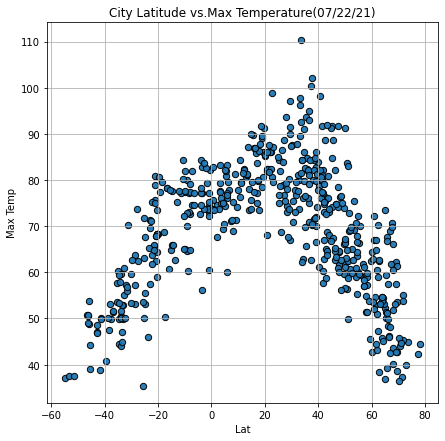

In [17]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Max Temperature(07/22/21)",
                     alpha=0.95,s = 40)
plt.show()

####  Analysis on the above Latitude vs. Max Temp plot
* The above plot shows the relationship between Latitude and Temperatures in the selected cities 
* As a general trend the hottest temperatures occurred near the equator.  Interestingly, the hottest temperatures grouped around latitudes (+20 degrees) slightly north of the equator. As you move away from the equator the maximum temperature gradually decreases, while in cities father away from the equator it gets way too cooler. 
* Interestingly, latitudes further from the equador in the north have lower temperatures than those further from the equador in the south. This is most likely because there are simply more cities in the northern end of the hemisphere, while the southern hemisphere is Antarctica, where there are no cities.

## Latitude vs. Humidity Plot

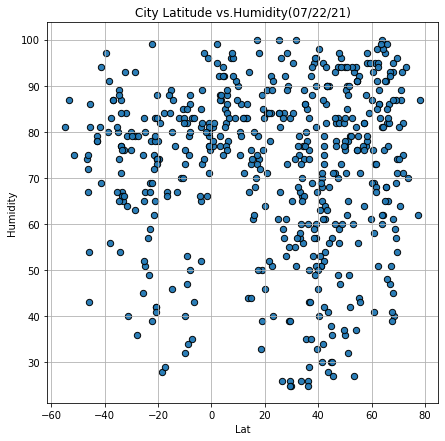

In [18]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Humidity(07/22/21)",
                     alpha=0.95,s = 40)
plt.show()

#### Analysis on the above Latitude vs. Humidity plot
----
* The visualization shows a great variety of humidity percentages at different latitudes. 
* Humidity appears to be mostly regular across latitudes. We can that there is no statistically significant relationship between humidity and latitude.Humidity does not show a strong correlation to latitude.Therefore, we cannot conclude that there is a conclusive pattern between humidity and latitude.

## Latitude vs. Cloudiness Plot

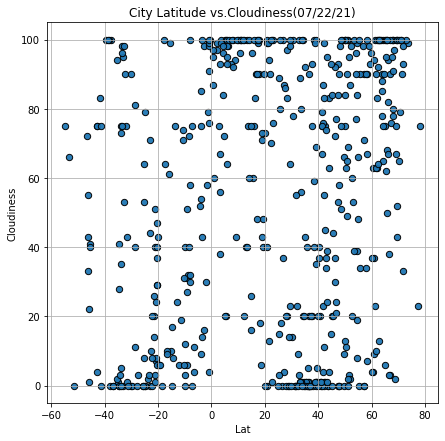

In [19]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Cloudiness(07/22/21)",
                     alpha=0.95,s = 40)
plt.show()

#### Analysis on the above Latitude vs. Cloudiness plot
----
* There was no correlation between city latitude and the cloudiness of a city. Interestingly, the likelihood of an equatorial city cloudiness (%) near zero was very low. 
* Interestingly, cloudiness seems to cluster around 0% and 100%.

## Latitude vs. Wind Speed Plot

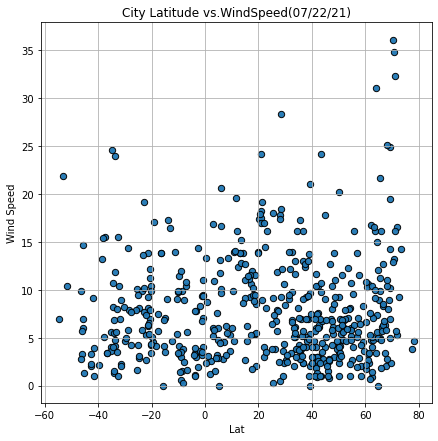

In [20]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.WindSpeed(07/22/21)",
                     alpha=0.95,s = 40)
plt.show()

#### Analysis on the above Latitude vs. Windspeed plot
----
* There are no clear patterns or relationships between latitude and wind speed
* Interestingly, wind speeds look to be lower the closer a location is to the equator. The northern hemisphere seems to have      more instances of high wind speeds than the souther hemisphere. 
* Wind appears to increase moderately as distance from the equator increases, with higher highs closer to the poles, and more concentrated lows near the equator.




## Linear Regression

In [21]:
#Getting the city data for Northern Hemisphere
Nothern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
Nothern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talaya,61.3833,152.7500,54.61,95,100,2.30,RU,1627081705
3,Novyy Svit,47.8059,38.0211,64.33,56,0,5.35,UA,1627081706
4,Pochutla,15.7432,-96.4661,89.82,61,60,6.24,MX,1627081706
5,Piranshahr,36.7010,45.1413,70.95,43,0,2.33,IR,1627081707
6,Qaanaaq,77.4840,-69.3632,42.37,62,23,3.85,GL,1627081707


In [22]:
#Getting the city data for Southern Hemisphere
Southern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]<0]
Southern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Vaini,-21.2000,-175.2000,80.76,83,40,8.05,TO,1627081705
2,Avarua,-21.2078,-159.7750,78.85,65,3,13.80,CK,1627081706
7,Atuona,-9.8000,-139.0333,77.43,76,40,11.43,PF,1627081707
8,Ushuaia,-54.8000,-68.3000,37.06,81,75,6.91,AR,1627081708
11,Perth,-31.9333,115.8333,57.18,84,75,6.91,AU,1627081581


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.45746367861818077


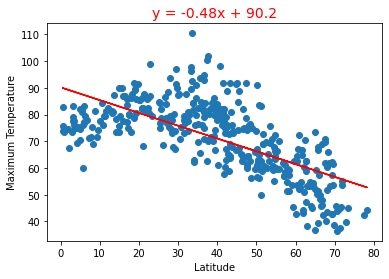

(Northern Hemisphere  - Max Temp vs. Latitude)R square value is: 0.45746367861818077
(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is: y = -0.48x + 90.2


In [23]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6689511427530916


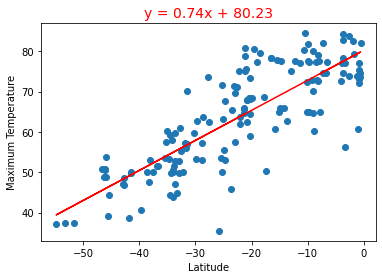

(Southern Hemisphere- Max Temp vs. Latitude)R square value is: 0.6689511427530916
(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is: y = 0.74x + 80.23


In [24]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Maximum temperatures on Northern and Southern Hemisphere
----
* When checking linear regression, Maximum Temperature and latitude has a weak Correlation in Nothern Hemisphere while has a Moderate Correlation in southern hemisphere. 
* In both the hemispheres there is drop in temperatures as the cities move away from the equator, The linear regression lines shows a steeper slope for the northern hemisphere which indicates that there is a steeper drop in temperature in the North as you move further from the Equator.


###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.002797854653559659


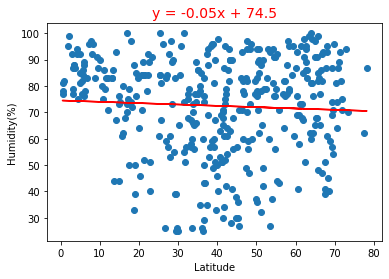

(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is: 0.002797854653559659
(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is: y = -0.05x + 74.5


In [25]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0035502139977895497


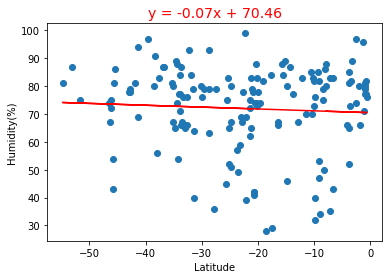

(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is: 0.0035502139977895497
(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is: y = -0.07x + 70.46


In [26]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Humidity on Northern and Southern Hemisphere
----
* When checking liner regression, humidity and latitude has almost no correlation in both of northern hemisphere and southern hemisphere.



###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 8.769003575346481e-05


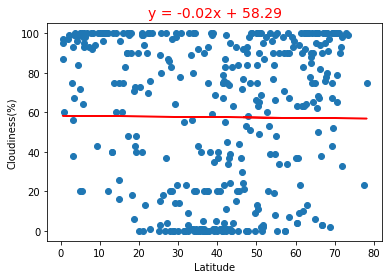

(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is: 8.769003575346481e-05
(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is: y = -0.02x + 58.29


In [27]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035867809090706446


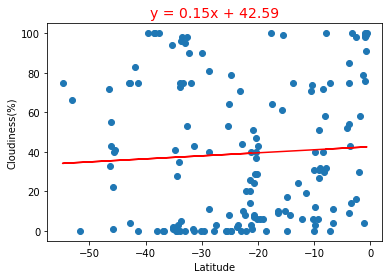

(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is: 0.0035867809090706446
(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.15x + 42.59


In [28]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Cloudiness on Northern and Southern Hemisphere
----
* When checking liner regression, cloudiness and latitude has almost no correlation in both of northern hemisphere and southern hemisphere.


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 3.419969507802266e-05


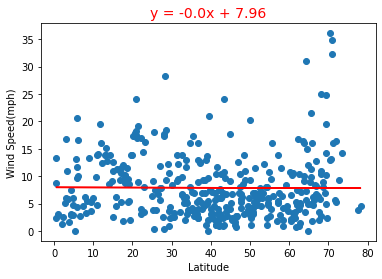

(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is: 3.419969507802266e-05
(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.0x + 7.96


In [29]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
northern_hemisphere_rvalue = rvalue**2
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.008020426816154063


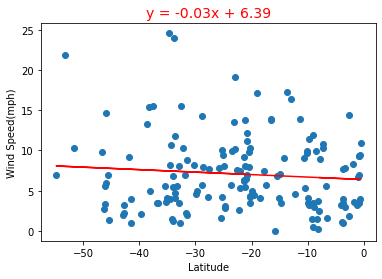

(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is: 0.008020426816154063
(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.03x + 6.39


In [30]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue**2}")
plt.show()
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

#### Analysis on the above  figure Latitude vs. Windspeed on Northern and Southern Hemisphere
----
* When checking liner regression, wind speed and latitude has almost no correlation in both of northern hemisphere and southern hemisphere.

